# 자연어처리 (NLP) 
- 자연어를 처리하는 분야
- 우리의 말을 컴퓨터에게 이해시키기 위한 기술 분야
- ex) 검색엔진, **질의응답 시스템**, 문장 자동요약, 감정분석


## 시소러스 thesaurus(유의어 사전)
- 유의어사전 / 동의어&유의어가 한 그룹으로 분류되어 있다.
- 사람이 단어의 의미 정의
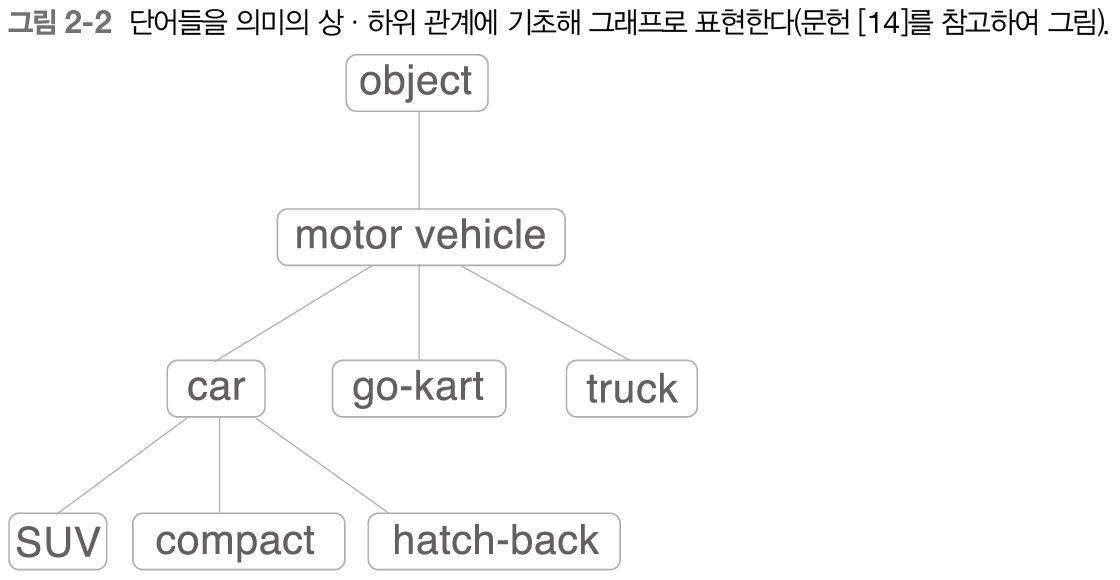
### WordNet 
- '단어 네트워크' 이용 -> 단어의 유사도 구하기
    - 문제점 1) 시대 편화에 대응하기 어렵다. 
    - 문제점 2) 사람 쓰는 비용이 크다.
    - 문제점 3) 단어의 미묘한 차이 표현할 수 없다. 

## 통계 기반 기법 - 말뭉치
- **말뭉치** : 대량의 텍스트 데이터 - 사람의 지식이 들어있다.
    - ex) 위키백과, 구글뉴스, 셰익스피어 작품  
    
### 파이썬으로 말뭉치 전처리하기

In [3]:
text = 'You say goodbye and I say hello.'

# text를 단어 단위로 분리
text = text.lower()    # 모두 소문자로 변경
text = text.replace('.',' .') # . 을 _.으로 변경
print(text)

words = text.split(' ')  # '공백'을 기준으로 나눠주기 (단어 목록 형태)
words 

you say goodbye and i say hello .


['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [4]:
# 단어에 ID 부여, ID의 리스트로 이용하게 변경
word_to_id = {}     # 딕셔너리 초기화
id_to_word = {}

for word in words:    #words에 있는 것을 word 변수로 반복해서 넣어준다.
    if word not in word_to_id:   # word_to_id에 없는 word가 단어라면
        new_id = len(word_to_id) # word_to_id의 갯수가 new_id (새로운 단어가 들어오면 번호 지정해주려고)
        word_to_id[word] = new_id # word_to_id 딕셔러니에서 [word]라는 키의 값은 new_id값
        id_to_word[new_id] = word # 
        
print(id_to_word)   # id : word
print(word_to_id)   # word : id

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [5]:
# 전처리한 데이터 활용 
print(id_to_word[1])

print(word_to_id['hello'])

say
5


In [6]:
# 단어목록 -> 단어 ID 목록으로 변경 -> 넘파이 배열로 변환
import numpy as np
corpus = [word_to_id[w] for w in words] 
# words에 있는 단어를 w에 담아 word_to_id에 담으면 숫자가 나옴 -> 그걸 corpus에 넣어주기

corpus = np.array(corpus) # 넘파이 배열로 변환
print(corpus)

[0 1 2 3 4 1 5 6]


In [7]:
# 한번에 모아서 처리하는 함수 - 말뭉치 전처리 수행

def preprocess(text):
    text = text.lower()     # 소문자로 바꾸고
    text = text.replace('.', ' .') #.으로 끝나면 _.으로 변경해주자
    words = text.split(' ') # 공백을 기준으로 단어 분리!

    word_to_id = {} 
    id_to_word = {}

    for word in words:    #words에 있는 것을 word 변수로 반복해서 넣어준다.
        if word not in word_to_id:   # word_to_id에 없는 word가 단어라면
            new_id = len(word_to_id) # word_to_id의 갯수가 new_id (새로운 단어가 들어오면 번호 지정해주려고)
            word_to_id[word] = new_id # word_to_id 딕셔러니에서 [word]라는 키의 값은 new_id값
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    # words에 있는 단어를 w에 담아 word_to_id에 담으면 숫자가 나옴 -> 그걸 corpus에 넣어주기
    return corpus, word_to_id, id_to_word

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(preprocess(text))

(array([0, 1, 2, 3, 4, 1, 5, 6]), {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}, {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})


### 전처리 완료 ! -> 말뭉치를 사용해 단어 의미 추출해보자
#### 단어의 분산표현  
- 색을 벡터로 표현 (RGB)
- 단어도 벡터로 ? :단어의 의미를 정확하게 파악한다 (분산표현!)  
  
#### 분포가설  
- 단어의 의미는 주변 단어에 의해 형성된다. 
- 단어 자체의 의미는 없지만, 단어가 사용된 맥락(context)가 의미를 형성한다.  
    - 맥락 : 특정 단어를 중심에 둔 그 주변 단어  
    - 맥락의 크기 = 윈도우 크기 / 윈도우 크기2 : 좌우 두 단어씩 맥락에 포함

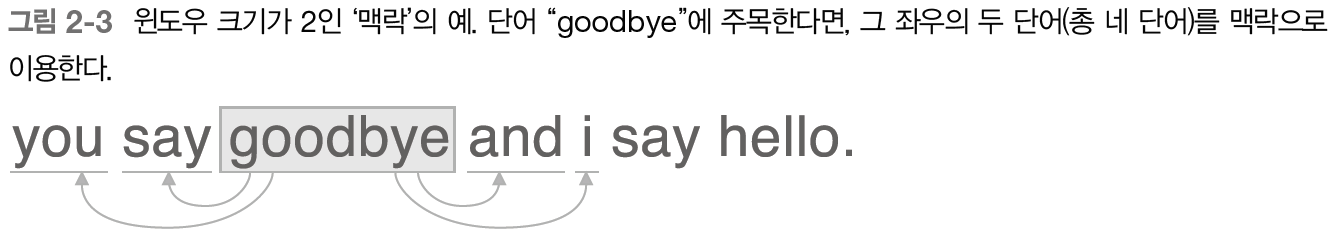  
  
#### 동시발생 행렬
- 주변에 어떤 단어가 몇번이나 등장하는가(통계기반 기법)

In [8]:
# 통계기반 기법
import sys
sys.path.append('..')
#from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


윈도우 크기는 1, 단어ID:0 인 you  

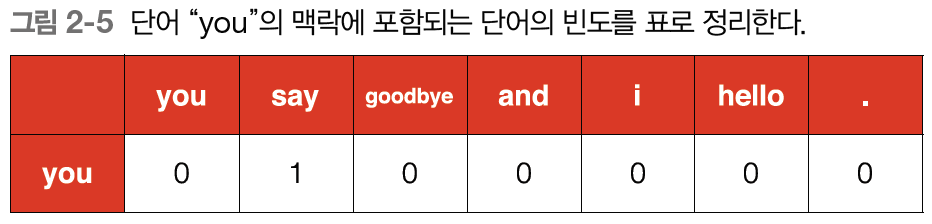  

you 의 맥락은 say 단어 하나뿐이다.   
you = [0,1,0,0,0,0,0] 벡터로 표현 가능   

---  
단어ID:1 인 say  
  say = [1.0.1.0.1.1.0]
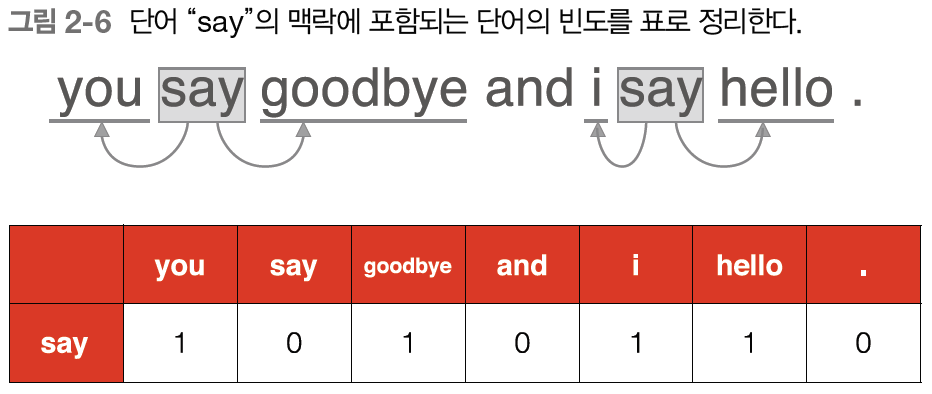  


### 동시발생 행렬
  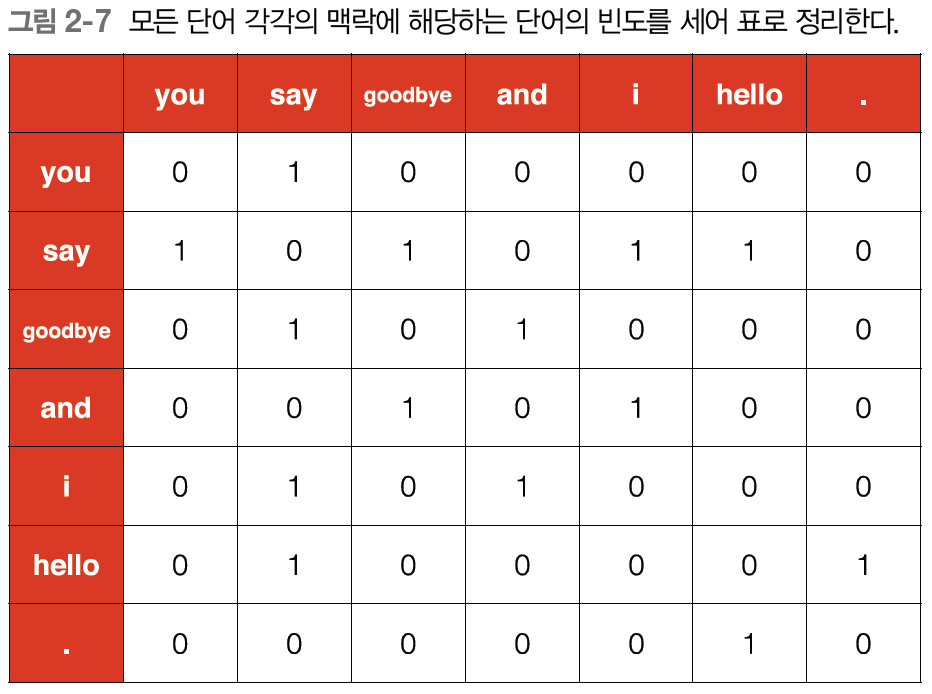

In [9]:
# 말뭉치의 동시발생 행렬 자동화 함수 만들기 - 말뭉치가 아무리 커지더라도 자동으로 만들어줌

# co_matrix 를 0으로 채워진 2차원 배열로 초기화한다. 
# 말뭉치의 모든 단어 각각에 대하여 윈도우에 포함된 주변 단어를 센다.
# 말뭉치의 왼쪽 끝과 오른쪽 끝 경계를 벗어나지 않는지도 확인한다.

def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

#### 벡터 간 유사도 측정 - 코사인 유사도
- **벡터를 정규화하고 내적을 구하는것**
- 정규화 : 각도만 본다 / 길이는 안 중요(동일)
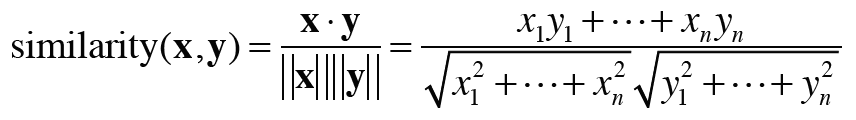
- 노름(norm): 벡터의 크기를 나타냄 / L2노름 사용

In [10]:
def cos_similarity_error(x, y):    # 인수 x,y는 넘파이 배열이라고 가정
    nx = x / (np.sqrt(np.sum(x ** 2)))
    ny = y / (np.sqrt(np.sum(y ** 2)))
    return np.dot(nx, ny)   # 벡터 x,y를 정규화 후 벡터의 내적을 구함

# 인수로 제로벡터(원소 모두 0인 벡터)가 들어오면 0으로 나누기(divide by zero) 오류 발생

In [11]:
def cos_similarity(x, y, eps=1e-8):  # 분모에 작은 값을 더해준다.
    '''코사인 유사도 산출

    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps) #엡실론
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [12]:
# 함수 이용하여 you와 I의 단어 벡터 유사도 구하기

import sys
sys.path.append('..')
#from common.util import preprocess, create_co_matrix, cos_similarity


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

# 코사인 유사도 값은 -1~1사이 이므로 0.7은 유사성이 크다고 말할 수 있다.

0.7071067691154799


In [13]:
# 유사 단어의 랭킹 표시 
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''
    :param query: 쿼리(검색어-단어)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
# 검색어의 단어 벡터를 꺼내기
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

# 검색어의 단어벡터와 다른 모든 단어 벡터와의 코사인 유사도를 각각 구하기
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

# 계산한 코사인 유사도 결과를 기준으로 값이 높은 순서대로 출력한다.
    count = 0
    for i in (-1 * similarity).argsort(): #argsort() = 넘파이 배열의 원소를 오름차순으로 정렬 : 반환값은 인덱스
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [14]:
# argsort() 메서드 
x = np.array([100,-20,2])
x.argsort()
# 넘파이 배열의 원소를 오름차순으로 정렬 : 반환값은 인덱스

array([1, 2, 0])

In [15]:
(-x).argsort() # 내림차순 정렬

array([0, 2, 1])

In [16]:
# you를 검색어로 지정 - 유사 단어 상위 5개 출력
import sys
sys.path.append('..')
#from common.util import preprocess, create_co_matrix, most_similar


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)

#goodbye, hello ? - 말뭉치가 너무 작다.


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


## 통계 기반 기법 개선하기
- 고빈도 단어가 더 강한 관련성을 갖는다.  

### 점별 상호정보량 (PMI) - 두 단어의 동시발생 횟수 0 이면 X
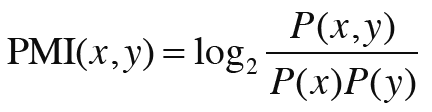  
P(x) : x가 일어날 확률  
P(y) : y가 일어날 확률  
P(x,y) : x와 y가 동시에 일어날 확률  
**PMI값이 높을수록 관련성이 높다**  

### ==> 양의 상호 정보량 (PPMI)
## PPMI(x,y) = max(0,PMI(x,y))

In [17]:
# PPMI 함수 구현
def ppmi(C, verbose=False, eps=1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부 = True(진행상황 알려줌)
    :return: ppmi
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)  # num of corpus
    S = np.sum(C, axis=0)  # 각 단어의 출현 횟수
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps) # 0으로 나눔 방지
            M[i, j] = max(0, pmi) # pmi 음수 일때 방지 - 0으로 취급
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print(f'{(100*cnt/total):.2f} 완료')
    return M

In [19]:
# 동시발생 행렬을 PPMI 행렬로 변환
import sys
sys.path.append('..')
import numpy as np
#from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('Co-occurrence Matrix - 동시발생행렬')
print(C) # 동시발생 행렬
print('-'*50)
print('PPMI')
print(W) # 각 원소는 0 이상

Co-occurrence Matrix - 동시발생행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


각 원소는 0 이상이라 좋군!  
하지만,,, 0 이 왜 이렇게 많아?! 안 중요한가봐! -> 노이즈에 약하고 견고하지 못하다.

### 차원 감소
- 문자 그대로 벡터의 차원을 줄이는 방법 (중요한 정보 유지)
- **특잇값분해(SVD)** :  

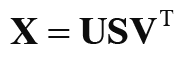
- U와 V는 직교행렬이고, 그 열벡터는 서로 직교
- S는 대각행렬(대각성분 외에는 모두 0인 행렬)

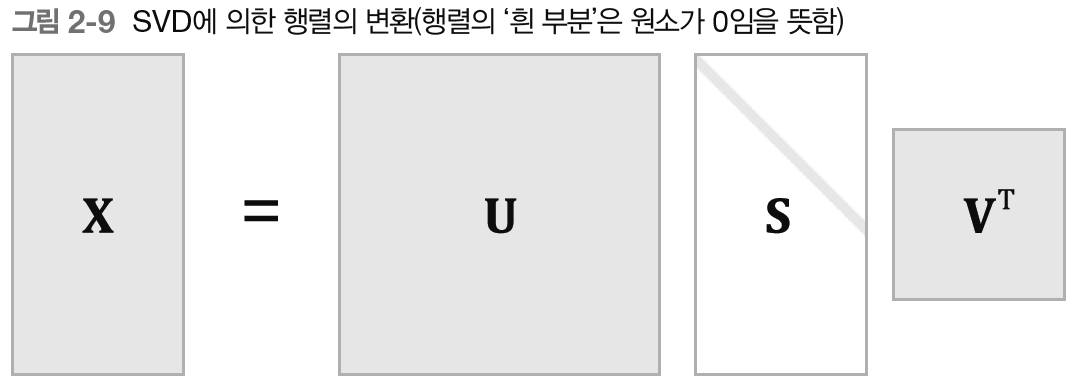
- U : 직교행렬 = 단어공간
- S : 대각행렬 = 대각성분에 특잇값이 큰 순서로 나열
    - 특잇값 : 해당 축의 중요도 
        - 특잇값이 작다면 S 깎아내기 ->> 행렬 U에서 여분의 열벡터 깎기

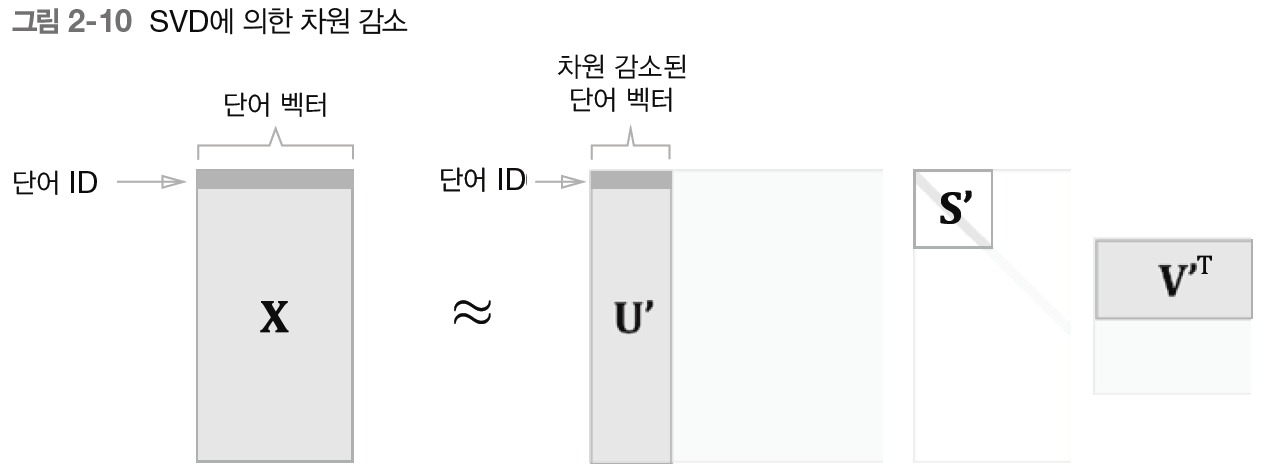

In [21]:
# 동시행렬->PPMI->SVD적용
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
#from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)    # linalg는 선형대수의 약어

print(C[0])  # 동시발생 행렬
print(W[0])  # PPMI 행렬
print(U[0])  # SVD

# 희소벡터인 W[0]이 SVD에 의해서 밀집벡터 U[0]으로 변했다.

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
  2.226e-16]


In [25]:
# 밀집벡터의 차원 감소 (2차원 벡터로 줄이기 = 2원소 꺼내기)
# 2차원으로 차원 축소하기(열벡터 깎아내기)

print(U[0, :2])

[-3.409e-01 -1.110e-16 -3.886e-16]


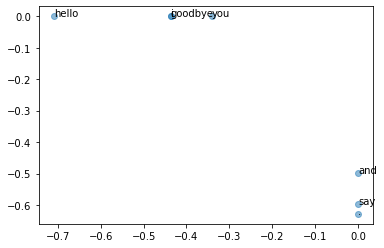

In [39]:
# 각 단어를 2차원 벡터로 표현 -> 그래프 표현
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

### PTB(펜 트리뱅크) 데이터셋
- PTB 말뭉치 : 한 문장이 하나의 줄로 저장 (하나의 큰 시계열 데이터로 취급)
    - 각 문장의 끝에 < eos > 라는 특수문자 삽입

In [40]:
import sys
sys.path.append('..')
#from dataset import ptb

corpus, word_to_id, id_to_word = load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

NameError: name 'dataset_dir' is not defined

### PTB 데이터셋 평가

In [ ]:
import syssys.path.append('..')
import numpy as npfrom common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산...')
W = ppmi(C, verbose=True)

print('SVD 계산...')
try:
    # truncated SVD (빠르다!) - 무작위 수를 사용하여, 특잇갑이 큰 것들만 계산 (SVD보다 빠르다)
    from sklearn.utils.extmath import randomized_svd  #sklearn의 randomized_svd 
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

    
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

# 정리
- 1) 시소러스 : 단어들의 관련성을 사람이 수작업으로 하나씩 정의한다.  
  
  
- 2) 통계 기반 기법 : 말뭉치로부터 단어의 의미를 자동 추출하고, 그 의미를 벡터로 표현
    - 단어의 동시발생 행렬을 만들고 PPMI행렬로 변환, SVD 이용해 차원감소 / 분산 표현 (의미가 비슷하면 벡터 공간에서도 서로 가까이 모여있다.)  
      
      
- 3) cos_similarity함수 (벡터 간 유사도 측정) / most_similar함수 (유사 단어 랭킹 표시)